In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Redes aleatórias

Existem vários modelos de redes aleatórias. Um exemplo é a rede aleatória em que fixamos o número de vértices $n$ e cada uma das potenciais $\frac{n(n−1)}{2}$ arestas poderia ocorrer na rede com a mesma probabilidade $p$, a qual é conhecida como modelo Erdös-Rényi, redes aleatória de Erdös-Rényi, rede
aleatória de Poisson ou rede aleatória de Bernoulli.

Um outro modelo de rede aleatória simples é quando fixamos além do número de vértices $n$ da rede, o número de arestas $m$ da mesma

Em geral, quando se analisa redes aleatórias, o interesse é estudar propriedades de resultados médios de redes que são geradas de acordo com uma certa distribuição de probabilidade sobre um conjunto de possíveis redes.

Devido a maior simplicidade para se obter analiticamente as propriedades médias das redes geradas, a rede aleatória de **Erdös-Rényi** é a mais utilizada.

Em uma rede aleatória não direcionada de **Erdös-Rényi**, o número de arestas é uma variável aleatória com distribuição Binomial de parâmetros ${n \choose 2}$ e $p$.

A seguir alguns métodos do **networkx** para se gerar grafos aleatórios.

### gnp_random_graph

**gnp_random_graph(n, p, seed=None, directed=False)**: returns a random graph, also known as an Erdős-Rényi graph or a binomial graph.

The model chooses each of the possible edges with probability.

Parameters:

n (int): the number of nodes.

p (float): probability for edge creation.

seed (integer, random_state, or None (default)): indicator of random number generation state.

directed (bool, optional (default=False)): if True, this function returns a directed graph.

### gnm_random_graph

gnm_random_graph(n, m, seed=None, directed=False): returns a G_{n,m} random graph.

In the G_{n,m} model, a graph is chosen uniformly at random from the set of all graphs with n nodes and m edges.

This algorithm should be faster than dense_gnm_random_graph() for sparse graphs.

Parameters:	

n (int): the number of nodes.

m (int): the number of edges.

seed (int, optional): seed for random number generator (default=None).

directed (bool, optional (default=False)): if True return a directed graph

### binomial_graph

**binomial_graph(n, p, seed=None, directed=False)**: returns a random graph, also known as an Erdős-Rényi graph or a binomial graph.

The model chooses each of the possible edges with probability.

Parameters:

n (int): the number of nodes.

p (float): probability for edge creation.

seed (integer, random_state, or None (default)): indicator of random number generation state.

directed (bool, optional (default=False)): if True, this function returns a directed graph.

### erdos_renyi_graph

erdos_renyi_graph(n, p, seed=None, directed=False): returns a random graph, also known as an Erdős-Rényi graph or a binomial graph.

The model chooses each of the possible edges with probability.

Parameters:

n (int): the number of nodes.

p (float): probability for edge creation.

seed (integer, random_state, or None (default)): indicator of random number generation state.

directed (bool, optional (default=False)): if True, this function returns a directed graph.

In [21]:
n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n,m,seed=seed)

In [22]:
print("node: degree, clustering")
for v in nx.nodes(G):
    print(f"{v} : {nx.degree(G, v)}, {nx.clustering(G, v)}")

node: degree, clustering
0 : 4, 0.3333333333333333
1 : 5, 0.3
2 : 4, 0.16666666666666666
3 : 4, 0.5
4 : 4, 0.16666666666666666
5 : 2, 0
6 : 2, 0
7 : 5, 0.3
8 : 5, 0.2
9 : 5, 0.3


In [23]:
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

the adjacency list
0 8 2 9 1
1 2 4 9 3
2 7 6
3 9 8 7
4 7 6 8
5 8 9
6
7 9 8
8
9


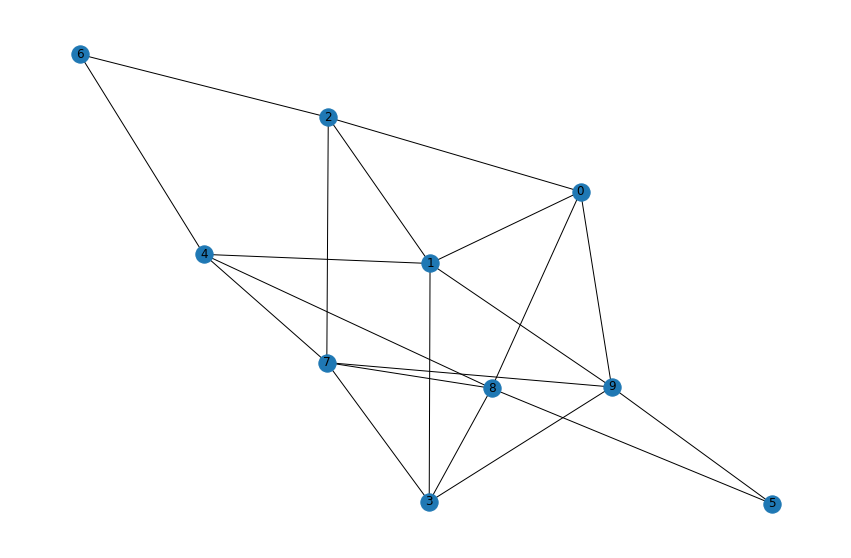

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [25]:
nx.binomial_graph is nx.gnp_random_graph

True

In [26]:
nx.erdos_renyi_graph is nx.gnp_random_graph

True

In [27]:
p = dict(nx.shortest_path(G))
print(p)

{0: {0: [0], 8: [0, 8], 2: [0, 2], 9: [0, 9], 1: [0, 1], 5: [0, 8, 5], 3: [0, 8, 3], 4: [0, 8, 4], 7: [0, 8, 7], 6: [0, 2, 6]}, 1: {1: [1], 2: [1, 2], 4: [1, 4], 9: [1, 9], 3: [1, 3], 0: [1, 0], 7: [1, 2, 7], 6: [1, 2, 6], 8: [1, 4, 8], 5: [1, 9, 5]}, 2: {2: [2], 1: [2, 1], 7: [2, 7], 6: [2, 6], 0: [2, 0], 4: [2, 1, 4], 9: [2, 1, 9], 3: [2, 1, 3], 8: [2, 7, 8], 5: [2, 1, 9, 5]}, 3: {3: [3], 9: [3, 9], 8: [3, 8], 1: [3, 1], 7: [3, 7], 5: [3, 9, 5], 0: [3, 9, 0], 4: [3, 8, 4], 2: [3, 1, 2], 6: [3, 8, 4, 6]}, 4: {4: [4], 7: [4, 7], 1: [4, 1], 6: [4, 6], 8: [4, 8], 2: [4, 7, 2], 9: [4, 7, 9], 3: [4, 7, 3], 0: [4, 1, 0], 5: [4, 8, 5]}, 5: {5: [5], 8: [5, 8], 9: [5, 9], 0: [5, 8, 0], 3: [5, 8, 3], 4: [5, 8, 4], 7: [5, 8, 7], 1: [5, 9, 1], 2: [5, 8, 0, 2], 6: [5, 8, 4, 6]}, 6: {6: [6], 4: [6, 4], 2: [6, 2], 7: [6, 4, 7], 1: [6, 4, 1], 8: [6, 4, 8], 0: [6, 2, 0], 9: [6, 4, 7, 9], 3: [6, 4, 7, 3], 5: [6, 4, 8, 5]}, 7: {7: [7], 4: [7, 4], 2: [7, 2], 9: [7, 9], 3: [7, 3], 8: [7, 8], 1: [7, 4, 1],

In [28]:
print([p for p in nx.all_shortest_paths(G, source=0, target=2)])

[[0, 2]]


In [29]:
p = dict(nx.shortest_path_length(G))  # source,target not specified
p

{0: {0: 0, 8: 1, 9: 1, 2: 1, 1: 1, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2},
 1: {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 9: 1, 5: 2, 6: 2, 7: 2, 8: 2},
 2: {2: 0, 0: 1, 1: 1, 6: 1, 7: 1, 3: 2, 4: 2, 8: 2, 9: 2, 5: 3},
 3: {3: 0, 8: 1, 9: 1, 1: 1, 7: 1, 0: 2, 2: 2, 4: 2, 5: 2, 6: 3},
 4: {4: 0, 8: 1, 1: 1, 6: 1, 7: 1, 0: 2, 2: 2, 3: 2, 5: 2, 9: 2},
 5: {5: 0, 8: 1, 9: 1, 0: 2, 1: 2, 3: 2, 4: 2, 7: 2, 2: 3, 6: 3},
 6: {6: 0, 2: 1, 4: 1, 0: 2, 1: 2, 7: 2, 8: 2, 3: 3, 5: 3, 9: 3},
 7: {7: 0, 2: 1, 3: 1, 4: 1, 8: 1, 9: 1, 0: 2, 1: 2, 5: 2, 6: 2},
 8: {8: 0, 0: 1, 3: 1, 4: 1, 5: 1, 7: 1, 1: 2, 2: 2, 6: 2, 9: 2},
 9: {9: 0, 0: 1, 1: 1, 3: 1, 5: 1, 7: 1, 2: 2, 4: 2, 8: 2, 6: 3}}

In [30]:
avg_sp = nx.average_shortest_path_length(G)
print(avg_sp)

1.6444444444444444


In [31]:
deg = nx.degree(G)
print(deg)

[(0, 4), (1, 5), (2, 4), (3, 4), (4, 4), (5, 2), (6, 2), (7, 5), (8, 5), (9, 5)]


In [32]:
dens = nx.density(G)
print(dens)

0.4444444444444444


In [33]:
clu = nx.clustering(G)
clu

{0: 0.3333333333333333,
 1: 0.3,
 2: 0.16666666666666666,
 3: 0.5,
 4: 0.16666666666666666,
 5: 0,
 6: 0,
 7: 0.3,
 8: 0.2,
 9: 0.3}

In [34]:
avg_clu = nx.average_clustering(G)
print(avg_clu)

0.22666666666666666


In [35]:
dia = nx.diameter(G)
print(dia)

3


In [36]:
ecc = nx.eccentricity(G)
print(ecc)

{0: 2, 1: 2, 2: 3, 3: 3, 4: 2, 5: 3, 6: 3, 7: 2, 8: 2, 9: 3}


In [37]:
n = 10
m = 20
G = nx.gnm_random_graph(n,m)

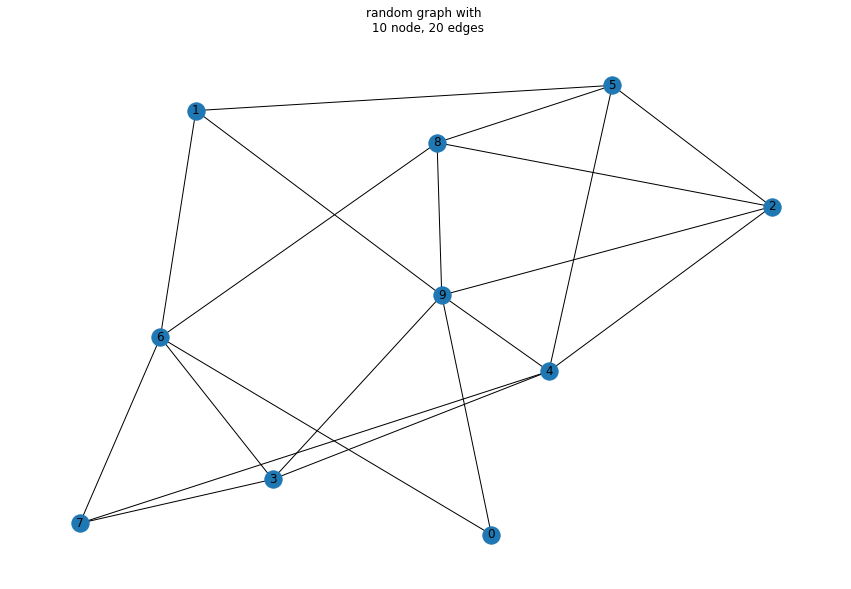

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

plt.title('random graph with \n 10 node, 20 edges')
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos=pos, with_labels=True)

plt.show()

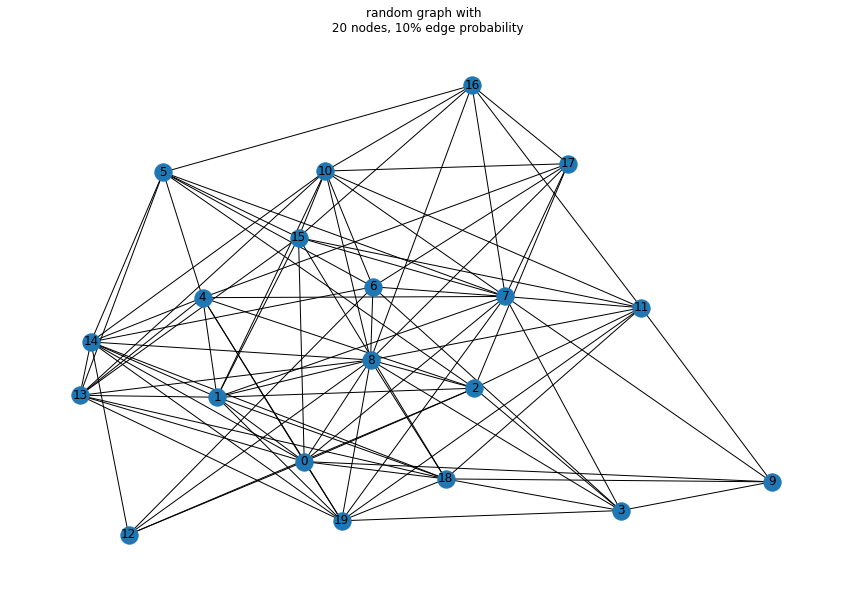

In [39]:
G = nx.gnp_random_graph(20,0.5)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.title('random graph with \n 20 nodes, 10% edge probability')
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

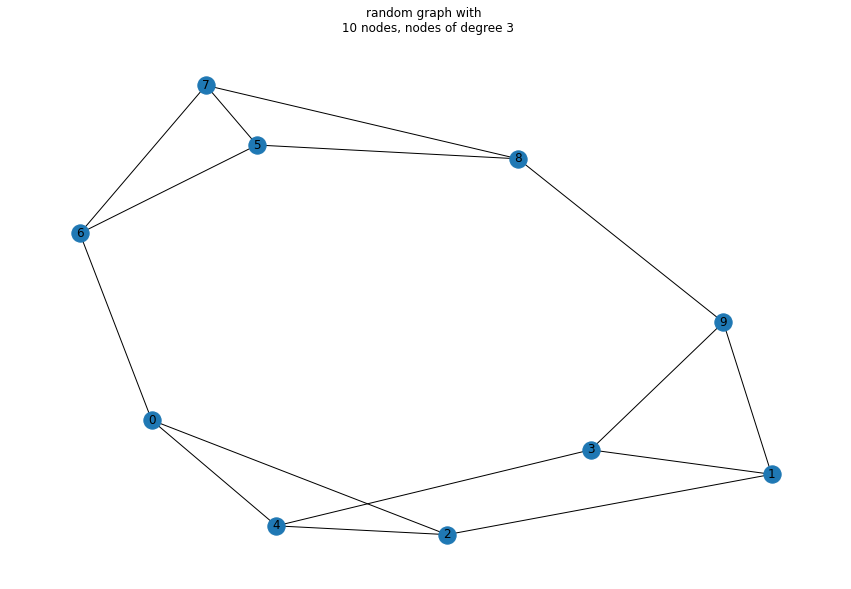

In [40]:
G = nx.random_regular_graph(3,10)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.title('random graph with \n 10 nodes, nodes of degree 3')
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

Calcule.
- centralidade de grau.
- valor médio do comprimento dos caminhos geodésicos.
- densidade.
- coeficiente de agrupamento.
- diâmetro.